In [2]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import astropy
from astropy.table import Table

In [61]:
def tname(i):
    path = '/home/raulteixeira/repos/CSPZ/scripts/tile_DR3_1_1.csv'
    metadata = np.genfromtxt(path, dtype='str', delimiter=",")[1:][int(i)]
    tilename = metadata[0][2:-1]
    return tilename

In [3]:
path = '/home/raulteixeira/repos/CSPZ/scripts/'
pb_Flux = np.loadtxt(path+'pb_Flux.txt', )
p_bayes_Flux = np.loadtxt(path+'p_bayes_Flux.txt')
p_i_Flux = np.loadtxt(path+'p_i_Flux.txt')
p_Flux = np.loadtxt(path+'p_Flux.txt')
f_obs_Flux = np.loadtxt(path+'f_obs_Flux.txt')
ef_obs_Flux = np.loadtxt(path+'ef_obs_Flux.txt')
f_mod_Flux = np.load(path+'f_mod_Flux.npy')
z = np.load(path+'z_Flux.npy')

pb_Mag = np.loadtxt(path+'pb_Mag.txt', )
p_bayes_Mag = np.loadtxt(path+'p_bayes_Mag.txt')
p_i_Mag = np.loadtxt(path+'p_i_Mag.txt')
p_Mag = np.loadtxt(path+'p_Mag.txt')
f_obs_Mag = np.loadtxt(path+'f_obs_Mag.txt')
ef_obs_Mag = np.loadtxt(path+'ef_obs_Mag.txt')
f_mod_Mag = np.load(path+'f_mod_Mag.npy')

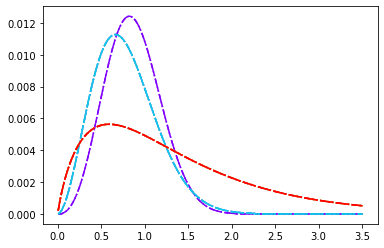

In [49]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 8))
for it in range(8):
    plt.plot(z, p_i_Flux[:,it]/p_i_Flux[:,it].sum(), color=colors[it], ls='-.') 
    plt.plot(z, p_i_Mag[:,it]/p_i_Mag[:,it].sum(), color=colors[it], ls='--')
plt.show()

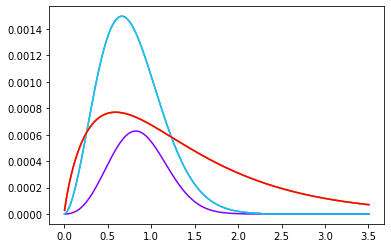

In [44]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 8))
for it in range(8):
    plt.plot(z, p_i_Flux[:,it], color=colors[it], ls='-')
plt.show() 

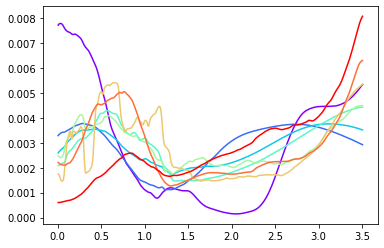

In [43]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 8))
for it in range(8):
    plt.plot(z, p_Mag[:,it]/p_Mag[:,it].sum(), color=colors[it], ls='-')
plt.show() 

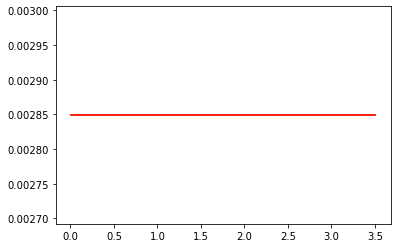

In [8]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 8))
for it in range(8):
    plt.plot(z, p_Flux[:,it]/p_Flux[:,it].sum(), color=colors[it], ls='-')
plt.show() 

In [51]:
np.unique(p_Flux)

array([1.])

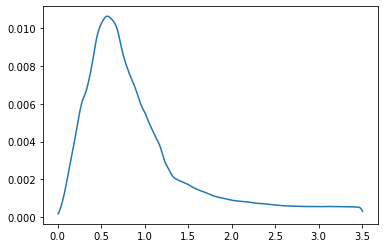

In [9]:
plt.plot(z, p_bayes_Mag)

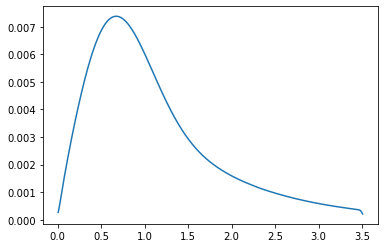

In [10]:
plt.plot(z, p_bayes_Flux)

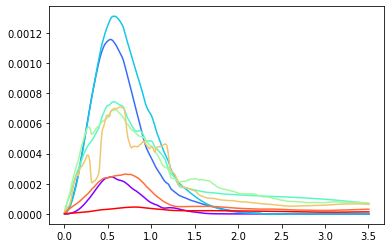

In [11]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 8))
for it in range(8):
    #plt.plot(z, pb[:,it]/pb[:,it].sum(), color=colors[it], ls='-')
    plt.plot(z, pb_Mag[:,it], color=colors[it], ls='-')
plt.show() 

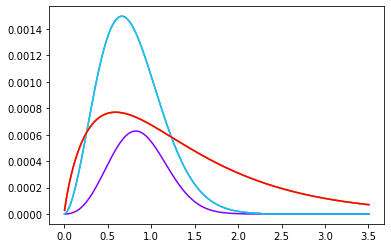

In [12]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 8))
for it in range(8):
    #plt.plot(z, pb[:,it]/pb[:,it].sum(), color=colors[it], ls='-')
    plt.plot(z, pb_Flux[:,it], color=colors[it], ls='-')
plt.show() 

In [14]:
f_obs_Flux.shape, f_obs_Mag.shape

((4,), (4,))

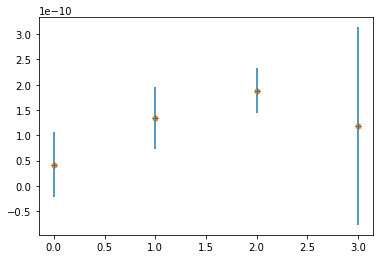

In [41]:
iz_b = np.argmax(p_bayes_Mag)
it_b = np.argmax(pb_Mag[iz_b,:])
best_model = f_mod_Mag[iz_b,it_b]
P2 = (f_obs_Mag * best_model) / ef_obs_Mag ** 2
P3 = (best_model / ef_obs_Mag) ** 2
norm = P2 / P3
best_model_norm = norm * best_model

plt.errorbar(np.arange(4), f_obs_Mag, yerr=ef_obs_Mag, fmt="+")
plt.plot(np.arange(4), best_model_norm, marker='o', ls='none', ms=5, )
plt.show()

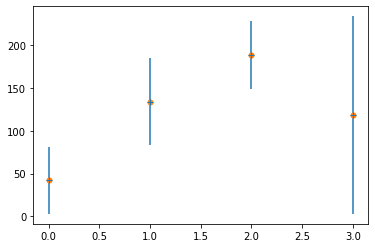

In [37]:
iz_b = np.argmax(p_bayes_Flux)
it_b = np.argmax(pb_Flux[iz_b,:])
best_model = f_mod_Flux[iz_b,it_b]
P2 = (f_obs_Flux * best_model) / ef_obs_Flux ** 2
P3 = (best_model / ef_obs_Flux) ** 2
norm = P2 / P3
best_model_norm = norm * best_model

plt.errorbar(np.arange(4), f_obs_Flux, yerr=ef_obs_Flux, fmt="+")
plt.plot(np.arange(4), best_model_norm, marker='o', ls='none', ms=5, )
plt.show()

In [30]:
print(f_obs_Mag), print(f_obs_Flux)

[4.19732374e-11 1.34013523e-10 1.88533161e-10 1.18324933e-10]
[ 41.97324371 134.01347351 188.53330994 118.32500458]


(None, None)

In [33]:
f_obs_Mag/f_obs_Flux

array([9.99999849e-13, 1.00000037e-12, 9.99999212e-13, 9.99999397e-13])

In [53]:
import desc_bpz
from desc_bpz.bpz_tools_py3 import p_c_z_t

In [64]:
likelihood_Flux = p_c_z_t(f_obs_Flux*1e-12, ef_obs_Flux*1e-12, f_mod_Flux)

In [57]:
likelihood_Mag = p_c_z_t(f_obs_Mag, ef_obs_Mag, f_mod_Mag)

In [ ]:
likelihood_Flux.chi

In [59]:
np.allclose(f_mod_Flux, f_mod_Mag)

True

In [62]:
likelihood_Flux.chi2

array([[31.95741874, 31.95741874, 31.95741874, ..., 31.95741874,
        31.95741874, 31.95741874],
       [31.95741874, 31.95741874, 31.95741874, ..., 31.95741874,
        31.95741874, 31.95741874],
       [31.95741874, 31.95741874, 31.95741874, ..., 31.95741874,
        31.95741874, 31.95741874],
       ...,
       [31.95741874, 31.95741874, 31.95741874, ..., 31.95741874,
        31.95741874, 31.95741874],
       [31.95741874, 31.95741874, 31.95741874, ..., 31.95741874,
        31.95741874, 31.95741874],
       [31.95741874, 31.95741874, 31.95741874, ..., 31.95741874,
        31.95741874, 31.95741874]])

In [65]:
likelihood_Flux.likelihood

array([[8.50614957e-01, 6.30584036e-01, 4.53017671e-01, ...,
        9.26420994e-02, 2.64081146e-02, 8.14039081e-04],
       [8.60890410e-01, 6.51430944e-01, 4.72835666e-01, ...,
        9.05416983e-02, 2.56707275e-02, 8.11948492e-04],
       [8.64232830e-01, 6.67655960e-01, 4.89208315e-01, ...,
        8.10187850e-02, 2.50509775e-02, 8.13809221e-04],
       ...,
       [3.41805497e-01, 4.86797256e-01, 8.34350120e-01, ...,
        8.96261548e-01, 2.05392145e-01, 4.33521955e-02],
       [3.48920577e-01, 4.79811504e-01, 8.26954854e-01, ...,
        9.07178746e-01, 2.07697212e-01, 4.42160611e-02],
       [3.56221402e-01, 4.73195477e-01, 8.19733926e-01, ...,
        9.17361826e-01, 2.09172191e-01, 4.49717943e-02]])

In [58]:
likelihood_Mag.likelihood

array([[0.94474218, 0.82175577, 0.68908932, ..., 0.29804875, 0.15347963,
        0.01448608],
       [0.95040392, 0.83253899, 0.70199775, ..., 0.29364246, 0.15093435,
        0.01447959],
       [0.95280675, 0.84067564, 0.7126032 , ..., 0.2746432 , 0.14876859,
        0.0145236 ],
       ...,
       [0.64202153, 0.73887082, 0.94170055, ..., 0.9025612 , 0.43359915,
        0.19074342],
       [0.64773556, 0.73454637, 0.9385124 , ..., 0.90733781, 0.43562522,
        0.19263681],
       [0.65347889, 0.73040403, 0.93536897, ..., 0.91191822, 0.43677006,
        0.1942371 ]])

In [63]:
f_obs_Flux, f_obs_Mag, ef_obs_Flux, ef_obs_Mag

(array([ 41.97324371, 134.01347351, 188.53330994, 118.32500458]),
 array([4.19732374e-11, 1.34013523e-10, 1.88533161e-10, 1.18324933e-10]),
 array([ 38.97063539,  50.36270858,  39.6016418 , 115.36611521]),
 array([6.42680567e-11, 6.11471146e-11, 4.40766186e-11, 1.95443869e-10]))